# 결정트리

## 개념/개요

- 데이터에 잇는 규칙을 학습을 통해서 자동으로 찾아내어, **트리** 기반으로 분류의 **규칙**을 만드는 알고리즘이다. 

- 규칙기반 프로그램
  - if ~ else ~ ...
  - 이런 조건들이 규칙이란 이름하에 사용된다. (단, 깊이의 문제, 만약 계속해서 내려가면 -> 성능저하 + 과적합 문제가 발생함) 

- 성능의 관건
  - 어떤 기준으로 규칙을 만드는가?
  - 더불어 효율적인 분류 규칙을 어떻게 만드는가? (공통)

- 노드의 정의, 룰
- 노드는 가지치기해서 트리가 내려갈때, 분기점, 끝점 등 
- 규칙 노드 :규칙이 존재, 피쳐들을 이용(결합)하여 규칙 조건을 만들어내는 노드 -> 가지치기(브랜치), 서브트리가 만들어진다.
- 리프 노드 : 해당 노드에서는 더이상의 분기점이 없다. 끝. 어떤 결정된 클래스 값을 가진다. (분류되었다.) 
- 서브 트리 : 새로운 규칙이 조건에 의해서 생성되면, 서브트리가 생겼다. (브랜치, 가지치기, ... ) 
 
- depth : 깊이, 깊을수록 예측의 성능이 저하될 가능성이 크다. -> 깊이에 대한 임계값이 필요하다. 
- 기타 체크포인트
  - 데이터가 균일하게 분류되도록(데이터 세트가 나눠지도록) 분할하는 부분 필요
  - 데이터의 균일성을 스케일링(전처리기, 정규화) 등을 통해서 처리 가능함 
  - 과적합에 대한 대비, 깊이감, 데이터가 한쪽으로 몰리는 문제 등등 조심

In [1]:
from IPython.display import Image

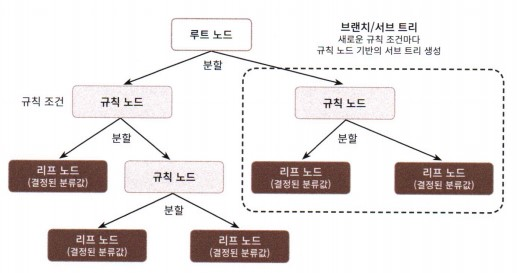

In [2]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_결정트리.jpg')

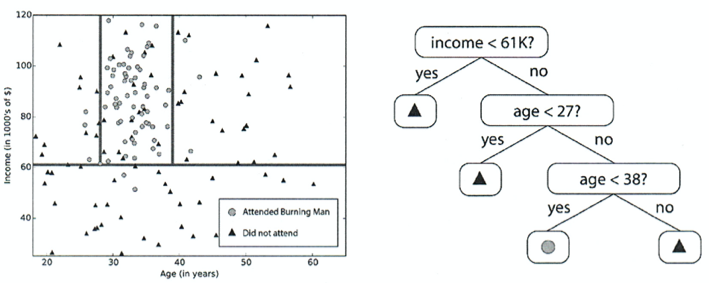

In [3]:
Image('res/머신러닝_알고리즘_참고쟈료/ml-의사결정트리.png')

- 목표
  - 결정트리(의사결정트리) 데이터의 균일도(정보의 균일도)가 높게 되도록 데이터 세트를 선택되게 규칙을 만드는 것!!! 
- 방법 
  - 지수 
    - 엔트로피를 이용한 정보이득(information gain) 지수
      - 혼잡도
      - 엔트로피는 주어진 데이터 집합의 혼잡도를 표현
      - 서로 다른 것들이 뒤섞여 있으면 엔트로피가 높다
      - 같은 것들끼리 섞여 있으면 엔트로피가 낮다
      - 정보이득지수 = 1 - 엔트로피지수
        - 정보이득 지수가 특정값(임계값) 보다 이상(혹은 이하)면 규칙노드로 해당 노드가 판단되고, 브랜치(가지치기)를 실행한다.
    - 지니 계수
      - 경제학에서 불평등 지수에서 나오는 지표
      - 0 : 가장 평등, 1 : 1에 가까워질수록 불평등하다. 
      - 데이터가 다양하면 평등, 특정값으로 쏠리면 불평등


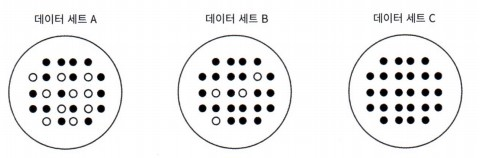

In [4]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_결정트리2.jpg')
# 엔트로피 기준으로 아래 그림을 설명해 보면
  # 데이터 세트 C : 정보가 균일하다.
  # 데이터 세트 A : 여러 정보가 섞여 있다. => 혼탁하다.
# 지니계수 기준
  # 데이터 세트 C : 특정 데이터가 균일 (특정값으로 쏠린다) -> 불평등하다
  # 데이터 세트 A : 여러 데이터가 섞여있다 -> 평등하다

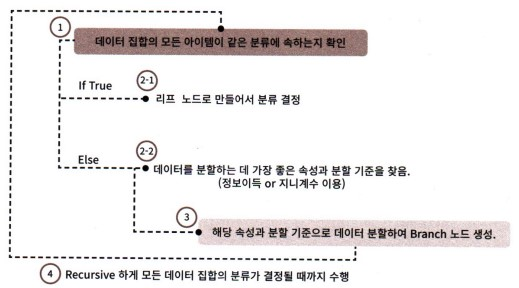

In [5]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_결정트리3.jpg')
# 가지치기 원리, 브랜치 작동원리
# 특정조건을 만족하면 리프노드로 분류된다.
# 아니면, 지니계수/정보이득지수를 이용하여 데이터군을 판단하여 가지치기 수행
# 이렇게 나눠지면 다시 반복!!

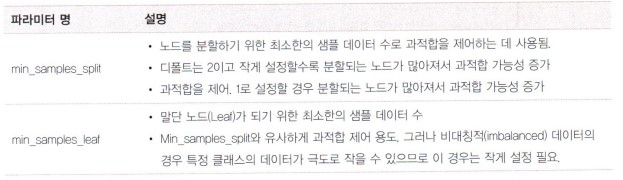

In [6]:
# 주요 하이퍼파라미터
Image('res/머신러닝_알고리즘_참고쟈료/분류_결정트리4.jpg')
# min_samples_split
  # 노드 분할을 위한 최소 샘플 수, 기본값2, 값이 줄어들수록 과적합이 될 수 있다.
# min_samples_leaf
  # 리프노드가 되기 위한 최소 샘플 수, 과적합 방지(제어) 용도

# 과적합 통제 수단

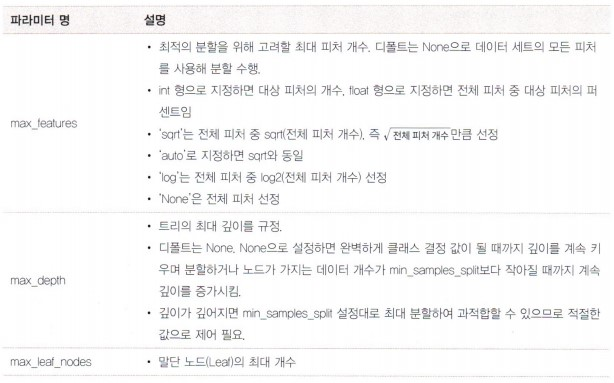

In [7]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_결정트리5.jpg')
# max_features   : 분할에 대한 최대 피처수 , None : 모든피쳐, 나머지 형태 => 수치, 함수로 지정
# max_depath     : 깊이에 대한 통제 (통제하지 않으면 잘 분류는 될 수 있으나, 과적합의 위험성이 높아진다.)
# max_leaf_nodes : 리프 노드의 수를 통제

### 기본적용

In [8]:
# 1. 모듈 가져오기 
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [9]:
# 2. 알고리즘 생성
# 가지치기를 수행한다면 기준값은 gini 를 사용하고, 리프노트의 최소 1, 분할에 대한 최소2 
# 최대 깊이는 None으로 최대치 등등 ... 기본값을 부여한 알고리즘을 만든것이다.
# 단, 난수를 0으로 넣음으로써, 환경을 통제하였다!!!
clf = DecisionTreeClassifier( random_state = 0 )
clf

DecisionTreeClassifier(random_state=0)

In [10]:
# 3. 데이터 준비 : 75:25, 변수명 동일, shape을 통해서 75:25 비율 확인
tmp = load_iris()
X_train, X_test, y_train, y_test = train_test_split(tmp.data, tmp.target , 
                                                    test_size=0.25,random_state = 0)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [11]:
# 4. 훈련 
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
# 5. 예측 -> 성능평가(생략), 최적화(생략), 덤프(생략)
y_pred = clf.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [13]:
clf.score(X_test,y_test)

0.9736842105263158

- 결정 트리가 어떤 과정을 거쳐서 노드를 분류했는지(브랜치, 가지치기를 수행했는지) 과정을 시각적으로 확인

In [14]:
# 모델, 정답의 이름, 특성의 이름 등을 포함하여서 덤프
from sklearn.tree import export_graphviz

# 확장자는 마음대루 (바이너리 파일임)
# 알고리즘, 특성명, 정답명 기록
export_graphviz(clf, out_file = 'dtree.model', feature_names= tmp.feature_names, class_names= tmp.target_names,
                filled = True)

In [15]:
# 덤프파일 로드 
# 파일을 열어보니 분류 정보들이 들어있는 텍스트 파일이었다. 
with open('dtree.model') as f :
    model_graph = f.read()

In [16]:
model_graph

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="petal width (cm) <= 0.8\\ngini = 0.665\\nsamples = 112\\nvalue = [37, 34, 41]\\nclass = virginica", fillcolor="#f8f4fe"] ;\n1 [label="gini = 0.0\\nsamples = 37\\nvalue = [37, 0, 0]\\nclass = setosa", fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal length (cm) <= 4.95\\ngini = 0.496\\nsamples = 75\\nvalue = [0, 34, 41]\\nclass = virginica", fillcolor="#e9ddfb"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petal width (cm) <= 1.65\\ngini = 0.153\\nsamples = 36\\nvalue = [0, 33, 3]\\nclass = versicolor", fillcolor="#4be78c"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 32\\nvalue = [0, 32, 0]\\nclass = versicolor", fillcolor="#39e581"] ;\n3 -> 4 ;\n5 [label="sepal width (cm) <= 3.1\\ngini = 0.375\\nsamples = 4\\nvalue = [0, 1, 3]\\nclass = virginica", fillcolor="#ab7bee"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 3\\nval

In [17]:
# 시각화
import graphviz

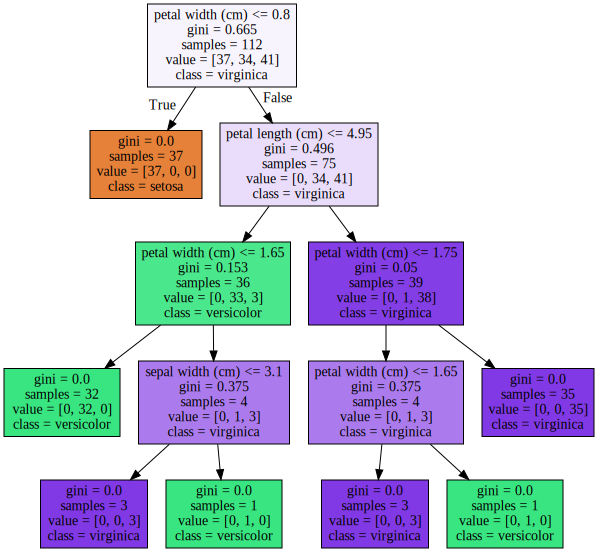

In [18]:
# 시각화 도구
graphviz.Source(model_graph)
# 샘플갯수로 오차율 짐작?

# 세토사 종은 바로 분류가 잘된다.
# 다른 2개의 종은 계속해서 가지치기를 하여서 분류하여야 한다.
# 이것을 통해서 4개의 피처들은 세토사는 좀 동떨어져 있고, 2개의 종은 서로 섞여 있음이 보인다.

# 지니계수는 내부적으로 계산되어서 적용되었음을 알 수 있다. (사용자 입장에서 컨트롤이 안됨)
# 그러면서 각 분류 시 어떤 피쳐를 사용하여 분류되었는지 확인 가능함

In [19]:
# 걸정 트리를 보니 사용하지 않은 feature(특성, 독립변수)가 보인다.
# 이것을 피처별 중요도로 표현하여, 중요하지 않다면 나중에 제거하는 방향도 고려할 수 있다.
# 시각적으로 데이터상 중요 feature 를 표현 -> 크기 비교 -> 바 차트 
import seaborn as sns
import numpy as np 

In [20]:
# 전체 특성 4개 중 분류 작업 시 기여도(중요도)를 표현한 값
# 순서는 피처이름 순으로 값이 나열된다.
clf.feature_importances_

array([0.        , 0.02014872, 0.39927524, 0.58057605])

In [21]:
fi = np.round(clf.feature_importances_, 3)
fi

array([0.   , 0.02 , 0.399, 0.581])

<AxesSubplot:>

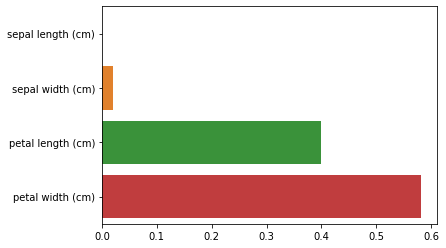

In [22]:
sns.barplot( x = fi, y = tmp.feature_names)
# 결정 트리 입장에서 sepal length(cm) 특성은 전혀 사용되고 있지 않다.
# 단, 알고리즘이 변경되면 그 중요도는 같이 변경된다. (역주행)

### 과적합 처리

In [23]:
# 데이터를 직접 생성해서 과적합들 발생시키겠다.
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
# 더미 데이터 생성 
'''
- n_samples     : 데이터의 총갯수, 기본값 100
- n_features    : 특성의 총갯수, 독립변수의 총갯수, 기본값 20
- n_informative : 독립변수들 중에서 종속변수와 상관관계가 있는 성분의 수 
- n_redundant   : 독립변수들 중에서 다른 독립 변수들과 선형 조합을 나타낼수 있는 수
- n_classes     : 종속변수의 클래스의 갯수(정답의 종류갯수, 범주형 데이터의 총갯수)
- n_clusters_per_class : 클래스당 클러스터(군집)의 갯수 
- random_state  : 난수의 시드를 고정함으로써 항상 일정하게 난수를 발생 
                  => 항상 동일한 데이터 발생 
'''
X, y = make_classification( n_features=2, n_redundant=0, n_informative=2, n_classes=3,
                            n_clusters_per_class = 1, random_state=0)

In [25]:
X.shape, y.shape

((100, 2), (100,))

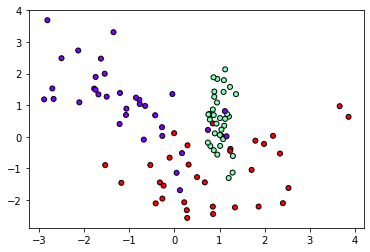

In [26]:
# 산포도를 통해서 데이터 분포를 그려보겠다.
# x 대비 y를 그리고, 정답의 종류가 3개 이므로, 산포도 상에 3가지 색상으로 포인트가 그려짐

# X축에 특성1, y축에 특성2 를 배치하고 그 사이에 정답을 표현하겠다.
plt.scatter(X[ :,0],X[ :,1],s=25, marker='o', c=y, cmap = 'rainbow' , edgecolors= 'k')
# 결정 트리 관점에서 보면
# 청록색 데이터들은 단번에 분류가 될것으로 보이고, 
# 빨강색과 보라색 데이터들은 몇 번의 분류 과정을 거쳐서 영역을 쪼갤수 있을 것이다. 

In [27]:
x1 = np.linspace(1,2,num=4)
y1 = np.linspace(4,5,num=4)
x1, y1

(array([1.        , 1.33333333, 1.66666667, 2.        ]),
 array([4.        , 4.33333333, 4.66666667, 5.        ]))

In [28]:
xx,yy = np.meshgrid(x1,y1)

In [29]:
xx, yy

(array([[1.        , 1.33333333, 1.66666667, 2.        ],
        [1.        , 1.33333333, 1.66666667, 2.        ],
        [1.        , 1.33333333, 1.66666667, 2.        ],
        [1.        , 1.33333333, 1.66666667, 2.        ]]),
 array([[4.        , 4.        , 4.        , 4.        ],
        [4.33333333, 4.33333333, 4.33333333, 4.33333333],
        [4.66666667, 4.66666667, 4.66666667, 4.66666667],
        [5.        , 5.        , 5.        , 5.        ]]))

In [30]:
# 배열을 1차 배열로 flatten(플랫툰) 
xx.ravel(), xx.ravel().shape

(array([1.        , 1.33333333, 1.66666667, 2.        , 1.        ,
        1.33333333, 1.66666667, 2.        , 1.        , 1.33333333,
        1.66666667, 2.        , 1.        , 1.33333333, 1.66666667,
        2.        ]),
 (16,))

In [31]:
# x(축)에 대한 y(축) 좌표 세트가 준비
tmp_x = np.c_[xx.ravel(), yy.ravel()]
tmp_x

array([[1.        , 4.        ],
       [1.33333333, 4.        ],
       [1.66666667, 4.        ],
       [2.        , 4.        ],
       [1.        , 4.33333333],
       [1.33333333, 4.33333333],
       [1.66666667, 4.33333333],
       [2.        , 4.33333333],
       [1.        , 4.66666667],
       [1.33333333, 4.66666667],
       [1.66666667, 4.66666667],
       [2.        , 4.66666667],
       [1.        , 5.        ],
       [1.33333333, 5.        ],
       [1.66666667, 5.        ],
       [2.        , 5.        ]])

In [32]:
# 등고선 플롯을 이용하여, 분포에 대한 경계를 그리겠다. -> 2d 형태로 보여질 것이다. 

def show_boundary(clf, X, y) :
  '''
    - parameter
      - clf : 분류기, 알고리즘
      - X : features data, 특성
      - y : label data, 정답
  '''
  # 0. 차트 정보 준비
  # _로 변수를 받으면 리턴을 받는데 사용하지 않겠다라는 명시적(관습적) 표현
  # ax는 차트의 축을 조작, 정보 획득, 데코하거나 하기위해서 획득
  _, ax = plt.subplots()

  # 1. 산포도 드로잉 -> 실제 데이터의 분포를 표현 
  ax.scatter(X[ :,0],X[ :,1],s=25, marker='o', c=y, cmap = 'rainbow' , edgecolors= 'k',
             zorder=3, clim=(y.min(), y.max()))
  
  # 2. 차트의 외곽 정리
  ax.axis('off')   # 축 정보를 삭제
  ax.axis('tight') # 데이터 분포를 펼쳐서 빡빡한 형태의 데이터를 여유있게 볼 수 있도록 조절

  # 3. 면적에 대한(분류의 결과에 맞춰서 공간을 차지하는) 데이터 준비 (x대비 y값들의 세트) -> numpy
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()
  # print(xlim_start, xlim_end)
  # print(ylim_start, ylim_end)

  # xx는 특성1, yy는 특성2
  xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num = 200), 
                       np.linspace(ylim_start, ylim_end, num = 200))
  # print(xx.shape, yy.shape)
  tmp_x = np.c_[xx.ravel(), yy.ravel()]

  # tmp_x 는 분류된 공간을 그리기 위한 x대비 y의 대응값의 세트데이터이다.
  # 이것이 어떤 색을 나타낼지 (어떤것으로 분류될지)는 밑에 등고선 플롯 드로잉시 결정된다. 

  # 4. 알고리즘 학습 -> 예측
  clf.fit(X,y)
  
  # 5. 예측 -> 한번도 접하지 못한 데이터 -> tmp_x
  # tmp_x 는 특성 1, 2를 2차 배열로 구성
  Z = clf.predict(tmp_x)
  print(Z)

  # 등고선 플롯 드로잉 -> 산포도가 위로 올라가게 레이어 조정(zorder=1)
  # 정답의 갯수
  class_num = len(np.unique(y)) # 3으로 나온다.( 데이터를 만들때 3개로 설정 )
  # xx, yy는 2차원 공간
  # Z는 2차원 공간상에 분포하는 데이터 -> 예측값
  # xx와 yy을 모두 연결해보면 바둑판이 된다.
  ax.contourf( xx, # x축을 200개로 쪼갠 배열
                yy, # y축을 200개로 쪼갠 배열
                Z.reshape( xx.shape ), # 그 바둑판을 무슨색으로 채울것인가 -> 이 바둑판은 무엇으로 예측되는가?
                # 정답 3개중에 한 개 
                # -----------Decoration---------------
                alpha = 1.0,
                levels = np.arange(class_num+1)-0.5,   # 면적에 대한 색상
                cmap = 'rainbow',
                clim = (y.min(), y.max()),
                zorder=1 
                )
  pass 


[2 2 2 ... 2 2 2]


<ipython-input-32-07a2fb97376c>:52: UserWarning: The following kwargs were not used by contour: 'clim'
  ax.contourf( xx, # x축을 200개로 쪼갠 배열


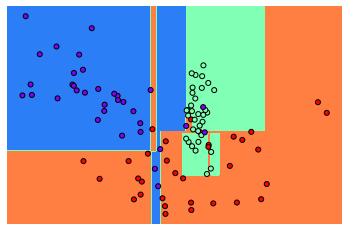

In [33]:
# 호출
clf = DecisionTreeClassifier()
show_boundary( clf,X, y )

# 해석

# 과적합으로 분류가 되었다.

# 데이터들을 일일이 분류하려고, 많은 분할 영역이 생겼다 -> 일일이 맞출려고 한다. 

# 데이터에 길들여 졌다. => 과적합(overfitting)으로 보여진다.

# 리프노드에 데이터가 균일하게 들어가야하는데 금이 많이 갔다. 
# 분류의 영역이 잘 나눠지게 결과가 나온다면 과적합을 잘 해결한 것이다.

- **show_boundary() 함수는 향후 다른 알고리즘도 분류기에 대한 과적합 체크, 분류된 영역을 시각화 할 때 사용 될 수 있다.**
- 단, 커스터마이즈 작업이 필요(케이스에 따라)

[2 2 2 ... 1 1 1]


<ipython-input-32-07a2fb97376c>:52: UserWarning: The following kwargs were not used by contour: 'clim'
  ax.contourf( xx, # x축을 200개로 쪼갠 배열


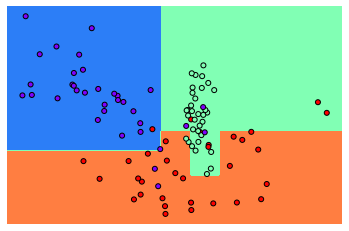

In [34]:
# 원데이터 그대로 사용해서 과적합을 막아보겠다. -> 하이퍼파라미터 튜닝
make_classification( n_features=2, n_redundant=0, n_informative=2, n_classes=3,
                            n_clusters_per_class = 1, random_state=0)
# 결정트리에서 어떤 부분을 조정하면 과적합이 줄어들것인가
# 여기서는 리프노드에 대한 통제 
# min_samples_leaf (리프노드의 최소 샘플 : 데이터수)를 4, 5, 6으로 조정
clf = DecisionTreeClassifier(min_samples_leaf=5)
show_boundary( clf,X, y )
# 과적합에 대한 부분은 하이퍼파라미터의 미세조정으로 최종확인할 수 있다.
# 이 조정된 모델에 대한 정확도를 체크하여 최종적으로 가장 적절한 모델을 확정하면 된다.

# 앙상블 학습

## 개념

- Ensemble Learning
- 여러개의 알고리즘(분류)을 생성(동일 혹은 다른종류)하여, 그 예측값들을 결합(평균 등등...) 하여 최종 예측을 도출하는 기법
  - 약한 알고리즘을 뭉쳐서 강한 모델을 만드는 방식
- 단일 분류기(알고리즘) 보다 높은 성능/신뢰성을 얻을 수 있다. 
- 분야
  - 딥러닝 : 이미지, 영상, 자연어 등등
  - 머신러닝 > 지도학습 > 앙상블 : 정형 데이터의 예측 분석 영역에 많이 사용된다. kaggle에서 상위권에 랭킹이 된 팀들이 많이 사용하는 기법 -> XGBoost도 앙상블의 기법 중 하나이다.


- 특징/원리
  - 서로 다른(혹은 같은) 알고리즘을 여러개 사용 결합 
  - 기본적으로 사용하는 알고리즘은 결정트리를 사용한다. 
  - 약한 분류기(성능이 좀 떨어지는 알고리즘)들을 여러개 결합하여, 확률적인 보완, 오류에 대한 가중치를 업데이트(경사하강법, 최적화 기법 중에 하나이다.)등이 수행되서, 예측성능을 향상시키는 기법

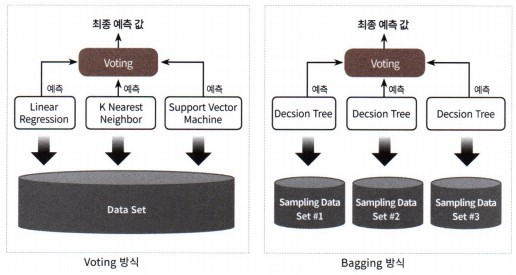

In [35]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블1.jpg')
# 아래 그림은 동일 알고리즘? 서로 다른 알고리즘? 으로 파악하면 된다. 

## 보팅

- Voting
- 다른 알고리즘 여러개 사용
- 종류
  - 하드 보팅
    - **다수결의 원칙**
    - 예측한 결과값들 중에 다수로 분류된 예측값을 최종 보팅의 결과값으로 확정(결정)
  
  - 소프트 보팅
    - 하드 보팅의 문제점 보정 -> 다수결만 가다 보니, 비중에 고려를 하지 않는다.
    - 레이블(정답) 값이 **결정되는 확률을 모두 더해서 이것의 평균**으로 예측 -> 총 예측된 확률이 높은 쪽으로 결정되는 방식 -> 합리적이다. (승자승 아님)


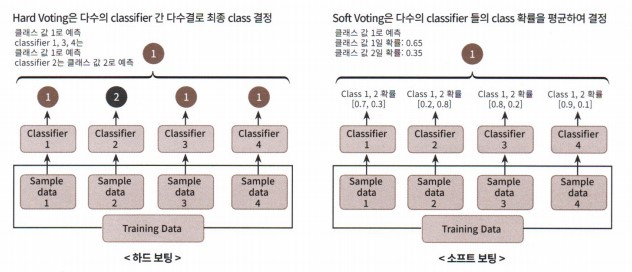

In [36]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블2_보팅.jpg')

In [37]:
# 보팅 구현 -> 알고리즘이 여러개, 하드 or 소프트
# 모듈가져오기 
# 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# 보팅 처리
from sklearn.ensemble import VotingClassifier
# 데이터 셋
from sklearn.datasets import load_breast_cancer
# 데이터 준비용(훈련, 테스트)
from sklearn.model_selection import train_test_split
# 평가도구
from sklearn.metrics import accuracy_score

# 데이터 분석용
import pandas as pd

In [38]:
# 데이터 로드
cancer = load_breast_cancer()

In [39]:
# data_df 로 로드 하시오, 상위값 2개 출력, 컬럼명 세팅
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [40]:
data_df.shape

(569, 30)

In [41]:
# 데이터를 75:25 나눈다. 난수는 0, cancer를 이용하여 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25, random_state=0)

In [42]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [43]:
# 알고리즘 선정과 데이터 준비는 상관 없다.
# 즉, 데이터를 준비하고 알고리즘을 선정해도 관계없음
# 알고리즘 준비 -> 서로 다른 종류의 알고맂듬을 선정
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier( n_neighbors=8 )
# 보팅 생성 
vo_clf = VotingClassifier( estimators=[ ('LR',lr_clf),('KNN',knn_clf) ], voting='soft' )

In [44]:
# 훈련 
vo_clf.fit(X_train, y_train)

C:\Users\jinta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [45]:
X_test.shape

(143, 30)

In [46]:
# 예측
# lr_clf와 knn_clf가 각각 데이터에 대해서 예측을 수행
# 1번 데이터에 대해 (양성 : 0, 악성 : 1) => lf_clf는 (0.24, 0.76), knn_clf는 (0.4,0.6)
# 합산을 해보면, (0.24+0.4, 0.76+0.6)에 의해 악성의 확률값이 더 높으므로 이 데이터 대해서는 1로 예측한다.
y_pred = vo_clf.predict(X_test)

In [47]:
# 성능평가 
accuracy_score(y_test, y_pred)

0.958041958041958

In [48]:
# 비교검증
# 개별 알고리즘을 돌려서 학습 후 예측하면 정확도는 어떻게 될 것인가?
clfs = [LogisticRegression(), KNeighborsClassifier(n_neighbors=8)]
for clf in clfs :
  # 학습
  clf.fit(X_train, y_train)
  # 예측
  y_pred = clf.predict(X_test)
  # 결과 출력
  print(clf.__class__.__name__, accuracy_score(y_test,y_pred))
  pass

# 개별 알고리즘의 정확도가 동일했던것은 우연,
# 중요한 것은 개별 알고리즘들을 모아서 보팅을 수행하였더니, 더 나은 결과가 나왔다.!!
# 다만, 매번 그럴것이다 라고 단정할수 없다.

C:\Users\jinta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.9440559440559441
KNeighborsClassifier 0.9440559440559441


### 앙상블 학습의 중요 포인트
- 앙상블은 편향과 분산이라는 2개의 상반된 개념을 적절하게 조절하는, **트레이드-오프** 문제를 해결하는데 주안점을 둔다. 
  - 편향 : 해당 값이 높으면 (바이어스) 특정 알고리즘이 특정 문제를 잘 맞추는데, 발전해 버려서 특정 포인트를 놓치는 과소적합의 문제를 야기할 수 있다,.
  - 분산 : 분산이 높으면 이상치를 잘 잡아내고, 이는 곧 과대 적합의 문제를 야기할 수 있다.
  - 이런 상반된 개념 2개를 밸런싱하여 최적의 모델을 만드는것에 주안점을 두는 것이 앙상블의 목표이다.

### 부트 스트래핑(boot strapping)
- cv(검증폴드를 구성한 학습. 세트(fold)를 나눠서 검증세트를 돌려가면서 학습수행. 세트값)가 앙상블에서는 어떻게 나눠지는가?
- 서브 세트에 중복된 데이터가 사용된다. (다른점)
  - 랜덤하게 특정 데이터세트가 중복되게 나와서 서브 세트를 구성하게 된다. (앙상블의 특징점)


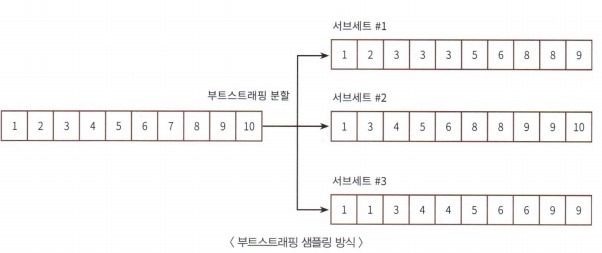

In [49]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블2_배깅_부트스트래핑.jpg')

## 배깅-랜덤포레스트

- Bagging
- 동일 알고리즘(분류기)를 여러개 만들어서, 보팅을 수행한다. 이를 통해 최종 결정하는 방식
- 대표 알고리즘
  - 랜덤포레스트
    - 뛰어난 성능, 빠른 수행시간, 유연성 등등
    - 기본 알고리즘으로 결정트리 사용
- 앙상블 기법 중 가장 빠른 수행속도를 가진다. 

- 방법론은 보팅과 같으나 재료가 다르다

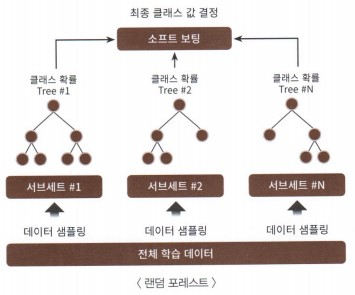

In [50]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블2_배깅_랜덤포레스트.jpg')
# 서브세트가 3 => 알고리즘이 3 => 하이퍼파라미터 중 n_estimators = 3 
# 서브세트에는 데이터가 중복된것들이 들어갈 수 잇다. -> 부트 스트래핑
# 3개의 결정트리는 각각의 하이퍼파라미터값을 가지고, 각각 서로 다른 데이터를 가지고 학습/예측
# 개별 데이터에 대한 분류 확률들이 나왔다. 이것을 다 더해서 최종 분류를 수행한다. => 소프트 보팅 수행 
# 이것이 랜덤포레스트다!!

- 랜덤 포레스트
  - 집단 학습 기반
  - 고밀도 정밀 분류, 회귀, 클러스터링도 가능하다. 
  - 보팅방식에 따라 하드/소프트 지원
  - 학습 데이터를 무작위로 샘플링 하기 때문데, 랜덤이 붙었다.

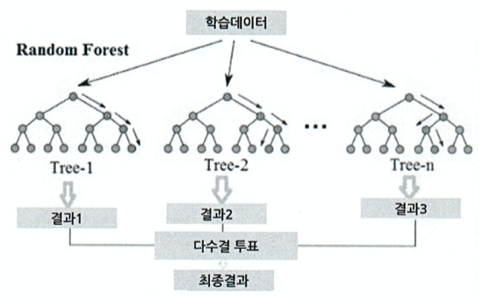

In [51]:
Image('res/머신러닝_알고리즘_참고쟈료/ml-랜덤포레스트.png')
# 아래 그림은 알고리즘 3개 사용, 분류 결정 방식은 하드 보팅을 사용했다. 

In [52]:
# 동일 데이터 사용
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [53]:
# 알고리즘생성
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier( random_state = 0 ) 

In [54]:
# 훈련
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [55]:
# 예측
y_pred = rf_clf.predict(X_test)
# 평가
accuracy_score(y_test,y_pred)

0.972027972027972

In [56]:
# 조금 더 정확도를 올려라 -> 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV
param_grid = {
    # 랜덤 포레스트의 하이퍼파라미터들을 값이 후보군들을 나열한다.
    'n_estimators' : [100], # 결정 트리의 갯수, 서브 세트의 갯수, 사용하는 알고리즘의 갯수
    'max_depth' : [6, 8, 10, 12], # 결정 트리의 최대 깊이 값, 적절하게 배분하였다.
    'min_samples_split' : [8, 12, 16], # 노드를 나누기 위한 최소 데이터 수, 임의로 배치
    'min_samples_leaf' : [8, 16, 24] # 리프 노드를 결정하는 최소 멤버수 
}

In [57]:
# 알고리즘1개에 대한 하이퍼파라미터 튜닝
# 알고리즘 필요.
# n_jobs = -1 : CPU코어를 몇개 동원할 것인가? -1은 모든 코어를 다 학습에 동원시킨다. 
rf_clf = RandomForestClassifier( random_state=0 , n_jobs=-1)

In [58]:
grid_cv = GridSearchCV( rf_clf, param_grid, cv=5, n_jobs=-1 ) 

In [59]:
# 학습 
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 16, 24],
                         'min_samples_split': [8, 12, 16],
                         'n_estimators': [100]})

In [60]:
# 최적의 파라미터, 최적의 점수
grid_cv.best_params_, grid_cv.best_score_
# 최종 결과값이 기본형 보다 낮았다. 왜, 하이퍼파라미터 튜닝 시 앞에 기본형에 사용된 기본값들을 포함하지 않아서
# 리프값 1, 스플릿값 2 등 이런 값들이 후보로 들어가지 않아서 우연하게도 더 성능이 낮게 나왔다. 

({'max_depth': 6,
  'min_samples_leaf': 8,
  'min_samples_split': 8,
  'n_estimators': 100},
 0.9459917920656634)

In [61]:
# 원데이터에서 피쳐수는 30개이다. 이중에서 분류에 큰 영향을 미치는 (중요한 영향력을 가진) feature가 있다. 
# 30개의 특성들을 중요도 순으로 정렬하여 시각화 하시오
rf_clf = RandomForestClassifier( random_state=0)
rf_clf.fit(X_train,y_train)
# 특성 순서대로 중요값들이 나열 -> 배열 
tmp = rf_clf.feature_importances_
tmp

array([0.02515433, 0.01563844, 0.05372655, 0.04861645, 0.00769078,
       0.00936994, 0.05539489, 0.10305394, 0.0065771 , 0.00282708,
       0.02921459, 0.00607814, 0.01342868, 0.03420174, 0.00360641,
       0.00432096, 0.00448775, 0.00657502, 0.00460597, 0.00627095,
       0.11657269, 0.01603133, 0.16027724, 0.0634688 , 0.01356448,
       0.01164113, 0.03923725, 0.11711756, 0.01164259, 0.00960721])

In [62]:
# 중요도를 시각화를 통해서 표현 => 크기 비교 => 바차트 (횡)
# 시리즈로 구성 
tmp_s = pd.Series(tmp, index = cancer.feature_names)
# 값이 높은 곳에서 낮은 순으로 정렬 하시오
tmp_s = tmp_s.sort_values( ascending=False )
# 상위 5개 만 출력
tmp_s[:5]

worst perimeter         0.160277
worst concave points    0.117118
worst radius            0.116573
mean concave points     0.103054
worst area              0.063469
dtype: float64

In [63]:
# 시각화 확인
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

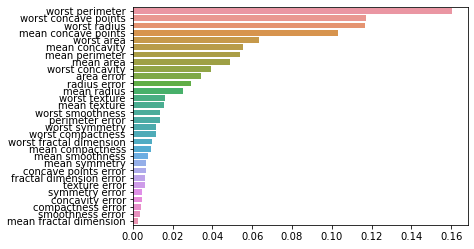

In [64]:
sns.barplot( x =tmp_s, y = tmp_s.index)
plt.show

## 부스팅

- Boosting
- 최근 가장 많은 사용 빈도를 보인다.
- 여러 개의 약한 분류기를 순차적으로 학습 예측하여, 잘못예측한 데이터에 **가중치를 부여하여 오류를 개선**하면서 학습을 진행하는 방식 
- 여러 알고리즘들은 각자의 방식에 따라서 오류를 개선한다.

### AdaBoost

- 그림 설명을 통한 부스트 과정 이해
- Step1 : 분류 기준 1을 기준으로 잡고, +를 분류한다. 만약, - 영역에 + 가 포함되어 있다면, 동그라미를 치고, 잘못 분류가 된 것으로 간주

- Step2 : 분류가 잘못된 데이터(오류데이터)를 에 대해서 가중치를 부여한다. +가 커졌다. (잘 발견된다)

- Step3 : + 와 - 를 분류하는데 가중치 받은 오류데이터들에 영향을 받아서 분리영역이 더 커졌다. + 영역에 - 데이터들이 존재하게 되었고, 이 데이터를 우리는 잘못 분류된 데이터(오류데이터)라고 한다. 동그라미 표시 

- Step4 : 오류데이터에 대해서 가중치를 부여. -가 커졌다.

- Step5 : 반복...

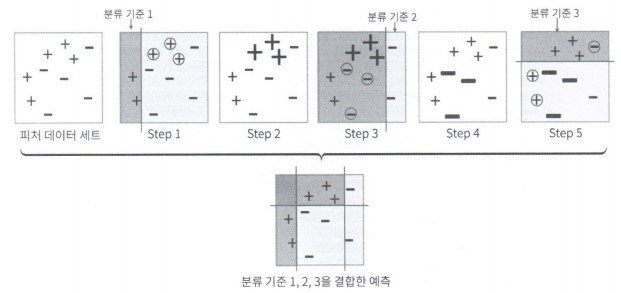

In [65]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블3_부스트.jpg')

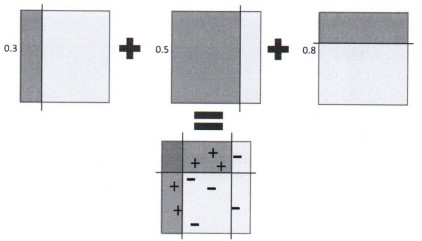

In [66]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블3_부스트2.jpg')
# 여러번의 분류를 계속하면서, 구분된 분류 영역(아래 그림에서는 영역들을) 합산해보니
# 진한 곳과 연한 곳이 나타난다. (수치로 표현) 이런 특정값이 이상은 +, 이하는 - 표현한다면 잘 분류가 될 것이다.

### GBM

- Gradient Boost Machine
- Ada 부스트와 차이점은 가중치를 업데이트 하는 방법론
- GBM 은 경사하강법이라는 가중치 업데이트 방법을 이용한다. 
  - 경사하강법
    - 특정값(0.001)을 지속적으로 업데이트하면서, 예측값이 향상되었는지를 체크 -> 가중치값이 시간이 지나면 기울어진다. -> 이런 모습때문에 경사하강법이라고 표현하고, 최적화기법에 해당(딥러닝쪽) => 가중치의 미세조정을 통해서 최적의 정확도를 얻을때 까지 반복하는 행위 => 시간이 많이 소요된다. 

- 예
  - h(x) = y - F(x) = 실제값 - 예측값 = 오차
  - 오차값을 최소로 하는 방향으로 F(x)를 구성하는 성분 중 가중치(W : weight)를 미세 조정하는 (업데이트하는) 방식.

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
import time 

In [68]:
# 시작시간
start_time = time.time()

# GBM : 작업 
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
print( accuracy_score(y_test, y_pred))
# 종료시간 

# 종료시간 - 시작시간 = 경과시간 
time.time() - start_time

0.965034965034965


0.6286454200744629

In [69]:
# 하이퍼파라미터 튜닝 
'''
  - loss          : 경사하강법 시 미세조정을 통해서 오차값을 줄인다.-> 손실함수로 판단, 함수의 종류, 성격 기술
  - learning_rate : 학습 시 적용되는 학습 비율, 0.1 ~ 1.0 비율을 조절해보면서 판단
                    -> 가중치를 조절하는 미세조정값 한번에 조정하는 미세조절값
  - n_estimators  : 분류기의 갯수 -> 결정트리의 갯수
  - subsample     : 분류기에서 사용하는 학습 데이터의 샘플링 비율. 기본값 1
'''

param_grid ={
    'learning_rate' : [0.05, 0.1],
    'n_estimators' : [100, 500]
}
gb_clf = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(gb_clf, param_grid, cv=3, verbose=True)
grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   17.8s finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [100, 500]},
             verbose=True)

In [70]:
grid_cv.best_params_, grid_cv.best_score_
# 파라미터 튜닝을 통해서 1.2% 하락?-> 튜닝전 정확도와 비교했을때 -> best_score는 검증용 가지고 한것으로 내부점수 
# 따라서 실제 테스트 데이터와 한 것이 중요하지 앞에와는 의미없다

({'learning_rate': 0.05, 'n_estimators': 500}, 0.9577464788732394)

In [71]:
# 최종 한번도 접하지 못한 데이터
y_pred = grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test,y_pred)

0.965034965034965

### XGBoost

- 부스팅 기법 중 가장 많이 사용된다. 
- GBM에 기반한 학습법의 문제점인 느린 수행시간, 과적합 규제 방안(과적합을 방지할 수 있는 조치사항, 파라미터 등등)이 없다는 문제점을 개선하기 위해 나온 
- 병렬학습이 가능 -> 학습 효율을 극대화 할 수 있다. 
- 하이퍼파라미터는 GBM과 동일한데, 과적합 규제 방법을 추가로 제공

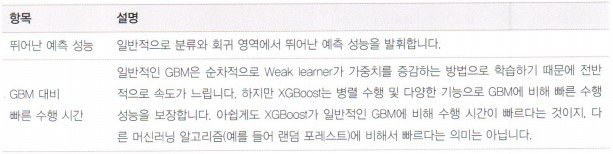

In [72]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블3_xgboost1.jpg')

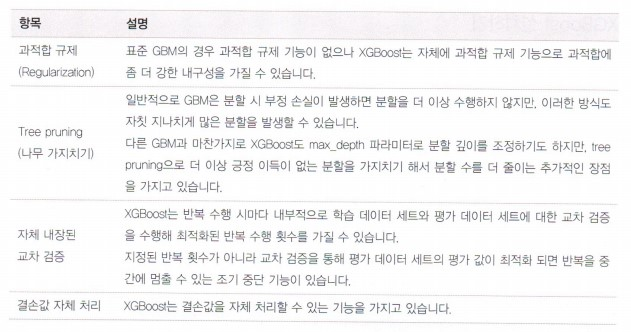

In [73]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블3_xgboost2.jpg')

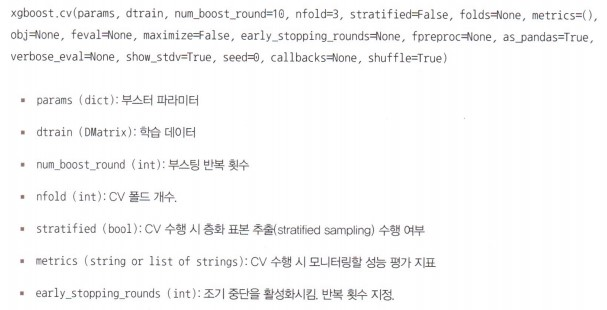

In [74]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블3_xgboost3.jpg')
# 학습 데이터의 포맷이 다르다 -> 기존 데이터를 DMatrix라는 형식으로 변환 처리
# cv : 교차검증을 수행하는 검증폴드에 대한 세팅
# stratified : 층화 표본 추출을 수행할 것인가? -> 모집단(훈련데이터 전체)을 중복되지 않게 층으로 나누고
#             각 층에서 표본을 추출한다. 
# early_stopping_xxxx : 조기 학습 종료 -> 이미 알고리즘이 특정 수준(레벨, 예측정확도에 변화가 없다)까지 수렴했다.
#                        -> 조기 학습 종료 : 딥러닝에서는 몇번 까지 해라 지정X, 연결만 해두면 자동처리
#                       여기서는 반복횟수 지정식으로 구현

In [76]:
!pip install xgboost

In [77]:
# 모듈 가져오기
import xgboost as xgb
xgb.__version__

'1.4.2'

In [78]:
# 암 데이터
data_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [79]:
data_df.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((569, 30), (426, 30), (143, 30), (426,), (143,))

In [80]:
# 1. 데이터 준비 -> 기존 데이터를 DMatrix로 변환처리 필수
# __init__ 이니 클래스다.
dtrain = xgb.DMatrix( data = X_train, label=y_train )
dtest = xgb.DMatrix(data=X_test, label=y_test)

#### XGBoost 하이퍼 파라미터 : params

- eta
  - 학습 비율, 가중치를 줄이는 비율값
  - 기본값 0.3, 사용 : 0.01 ~ 0.2 (변경가능함)

- min_child_weight(기본값 1)
  - 하위 노드단에서 요구되는 최소 가중치의 합
  - 각 노드 단계에서 W가 생성이 될 것이고, 그 값들을 미세조정하게 되는데, 하위 노드단에서 그 단계까지 오는 모든 가중치의 합에 대한 제한값
  - 값이 너무 크면 언더피팅(과소적합)에 걸릴 수 있다. 

- max_depth 
  - 트리의 깊이
  - 기본값 6(?), 3 ~ 10 일반적으로 사용

- max_leaf_nodes
  - 리프 노드의 최대 갯수 

- gamma(기본값 0)
  - 노드가 분할 시 필요한 최소 감소값 지정 (적용해 보면서 변화를 체크) 
  - 보수적인 처리!! -> 손실함수와 연결 (현재는 고려하지 않는다.)

- subsample(기본값 1)
  - 각 트리에서 관측하는 데이터 샘플링 비율
  - 과대 적합, 과소적합등에 대한 조정값 0.5 ~ 1

- colsample_bytree
  - 각 트리에서 피처 샘플링 비율
  - 기본 1
  - 0.5 ~ 1 일반적으로 사용

- lambda
  - 가중치에 대한 L2 정규화 (릿지 알고리즘)

- alpha
  - 가중치에 대한 L1 정규화 (라쏘 알고리즘)

- scale_pos_weight 
  - 데이터 분포에 대한 불균형을 맞춰주는 지표
  - 일반적으로 0보다 큰값을 부여한다.
  - 기본값 1 

- 알고리즘의 각 단계에서 최적화를 목표로 사용하는 파라미터이다. 

- objective -> 입력데이터에 대비하여 설정 
  - 기본값 (reg:linear 회귀쪽) 
  - binary:logistic  : 이진 분류를 위한 로지스틱 회귀, 분류에 대해 예측된 확률값을 반환한다. 
  - multi:softmax    : softmax를 사용한 다중 클래스 분류, 예측된 클래스(정답)을 반환한다. 
  - multi:softprob   : softmax와 유사하지만, 각 클래스에 대한 예상확률을 반환한다. 

- eval_metric : 평가도구, 성능평가지표
  - 회귀 분야 -> 손실함수 -> 값을 줄이는데 방점 (미세조정: 가중치)
    - rmse : root mean square error : 정답과 예측값 사이의 오차율 -> 작을수록 -> 예측값이 정답에 가깝다.
    - mse  : mean square error : 평균 제곱근 오차
    - mae  : mean absolute error : 평균 절대값 오차

  - 분류 분야 
    - logloss : 기본값
    - error
    - merror
    - mlogloss
    - auc 

- seed 
  - 난수 시드
  - 재현성 -> 동일한 결과를 매번 낼 수 있는가? -> 실험환경에 대한 중요한 파라미터, 모든 조건을 고정하고 한개의 파라미터를 수정하면서 테스트 한다면, 해당 파라미터가 성능에 어떤 영향을 미치는지 확인가능 -> 데이터의 재현성이 필요하다!

In [81]:
# 하이퍼파라미터 설정
params = {
    'objective' : 'binary:logistic', # 예측된 결과는 개별 클래스의 확률이다.
    'eval_metric' : 'logloss',       # 평가 시 사용되는 도구 => 일반적으로는 손실함수 정도로 표현
    'max_depth'   : 3,               # 트리의 깊이
    'eta'         : 0.1,              # 학습 시 가중치 업데이트 값, W의 미세조정값.
    'early_stopping' : 100            # 조기학습 종료, 100회에 도달하면 더 가지말고 종료
}

In [82]:
# 2. 알고리즘 선정/생성 -> 하이퍼파라미터 확인
value_list = [(dtrain,'train' ), (dtest,'eval' )]
# 훈련 시켜서 모델을 리턴 받는다.
xgb_model = xgb.train( params=params, dtrain=dtrain, num_boost_round=400, evals=value_list)

[22:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopping" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60924	eval-logloss:0.61543
[1]	train-logloss:0.54073	eval-logloss:0.54799
[2]	train-logloss:0.48409	eval-logloss:0.49012
[3]	train-logloss:0.43408	eval-logloss:0.44496
[4]	train-logloss:0.39133	eval-logloss:0.40245
[5]	train-logloss:0.35487	eval-logloss:0.36722
[6]	train-logloss:0.32379	eval-logloss:0.33630
[7]	train-logloss:0.29561	eval-logloss:0.30963
[8]	train-logloss:0.27062	eval-logloss:0.28575
[9]	train-logloss:0.24938	eval-logloss:0.26593
[10]	train-logloss:0.22944	eval-logloss:0.24623
[11]	train-logloss:0.21166	eval-logloss:0.22816
[12]	train-logloss:0.19583	eval-logloss:

[162]	train-logloss:0.00829	eval-logloss:0.04465
[163]	train-logloss:0.00823	eval-logloss:0.04437
[164]	train-logloss:0.00818	eval-logloss:0.04439
[165]	train-logloss:0.00816	eval-logloss:0.04426
[166]	train-logloss:0.00814	eval-logloss:0.04430
[167]	train-logloss:0.00812	eval-logloss:0.04432
[168]	train-logloss:0.00810	eval-logloss:0.04452
[169]	train-logloss:0.00808	eval-logloss:0.04453
[170]	train-logloss:0.00806	eval-logloss:0.04440
[171]	train-logloss:0.00805	eval-logloss:0.04460
[172]	train-logloss:0.00800	eval-logloss:0.04452
[173]	train-logloss:0.00798	eval-logloss:0.04456
[174]	train-logloss:0.00796	eval-logloss:0.04466
[175]	train-logloss:0.00794	eval-logloss:0.04453
[176]	train-logloss:0.00792	eval-logloss:0.04454
[177]	train-logloss:0.00791	eval-logloss:0.04474
[178]	train-logloss:0.00788	eval-logloss:0.04465
[179]	train-logloss:0.00786	eval-logloss:0.04471
[180]	train-logloss:0.00784	eval-logloss:0.04464
[181]	train-logloss:0.00782	eval-logloss:0.04450
[182]	train-logloss:

[329]	train-logloss:0.00610	eval-logloss:0.04281
[330]	train-logloss:0.00609	eval-logloss:0.04273
[331]	train-logloss:0.00609	eval-logloss:0.04275
[332]	train-logloss:0.00608	eval-logloss:0.04281
[333]	train-logloss:0.00607	eval-logloss:0.04264
[334]	train-logloss:0.00606	eval-logloss:0.04278
[335]	train-logloss:0.00605	eval-logloss:0.04272
[336]	train-logloss:0.00605	eval-logloss:0.04274
[337]	train-logloss:0.00604	eval-logloss:0.04281
[338]	train-logloss:0.00603	eval-logloss:0.04264
[339]	train-logloss:0.00602	eval-logloss:0.04274
[340]	train-logloss:0.00602	eval-logloss:0.04268
[341]	train-logloss:0.00601	eval-logloss:0.04282
[342]	train-logloss:0.00600	eval-logloss:0.04266
[343]	train-logloss:0.00599	eval-logloss:0.04263
[344]	train-logloss:0.00599	eval-logloss:0.04268
[345]	train-logloss:0.00598	eval-logloss:0.04272
[346]	train-logloss:0.00597	eval-logloss:0.04265
[347]	train-logloss:0.00596	eval-logloss:0.04271
[348]	train-logloss:0.00596	eval-logloss:0.04256
[349]	train-logloss:

- 해석 
  - 총 400회의 라운드를 진행 (훈련진행)
    - 400세대(400 예측) 훈련진행 -> 전체데이터를 풀로 다 사용히여서 훈련을 진행하면서 예측
  - 손실값이 줄어들게끔 미세 조정을 수행했을것이다(라운드가 끝나면 평가) -> 손실값을 줄이기 위해서 가중치의 미세조정 (eta값을 사용) 후 -> 학습진행
  - 400회가 수행될 때까지 조기학습 종료가 일어나지 않았다.
    - 조기 학습 종료가 발생할만 한 수렴점이 100회 이내에 발생되지 않았기 때문이다.

In [83]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [84]:
# 예측
y_pred = xgb_model.predict(dtest)
# y_pred 값은? shape을 보니 (143,) 이렇게 나왔다.
# 여기서는 값 1개에 대한 확률값이 나온것이다.
# 만약 1에 대한 확률 이라면 -> 최종그림은 [0,1,0,1,1,1]
y_pred.shape, y_pred

((143,),
 array([2.3405525e-04, 9.8979527e-01, 9.9970764e-01, 9.9816424e-01,
        9.9970192e-01, 9.9986601e-01, 9.9974698e-01, 9.9904031e-01,
        9.9519616e-01, 9.9996281e-01, 5.4593319e-01, 9.9736220e-01,
        9.9987650e-01, 6.1659372e-01, 3.6637300e-01, 5.8347001e-03,
        9.9191380e-01, 7.6820661e-04, 4.2511045e-04, 1.6818881e-04,
        7.3138729e-04, 2.0365433e-03, 9.9765980e-01, 9.9989188e-01,
        2.3005304e-03, 9.9982029e-01, 9.9963224e-01, 2.9972231e-02,
        9.9974328e-01, 1.1509767e-04, 9.9948668e-01, 2.1684058e-03,
        9.9715447e-01, 2.0087618e-04, 9.9958473e-01, 9.0431175e-05,
        9.9767786e-01, 7.9266280e-03, 9.9972039e-01, 2.6864620e-04,
        1.8739808e-01, 9.9991298e-01, 7.7983879e-02, 9.9952197e-01,
        9.5191294e-01, 1.7589763e-04, 9.9979573e-01, 9.9519938e-01,
        9.9574858e-01, 2.3783249e-04, 2.7669448e-04, 2.2733416e-03,
        7.2529503e-05, 9.9980873e-01, 9.9994278e-01, 9.9930739e-01,
        9.9475795e-01, 9.7934055e-01, 9

In [85]:
# 확률값을 분류값으로 (0 혹은 1로 변경해야 한다.) -> 정확도를 측정할 수 있다.
# 왜 확률로 나왔는가? binary:logistic을 사용했기 때문에
# 확률값이 0.5보다 크면 1, 아니면 0으로 처리하시오->y_pred
# 참일때 값 if 조건 else 거짓일때 값
# 악성 종양일 확률이 50% 이상이면 악성으로 예측하겠다. -> 아래에서 구현 
y_preds = [1 if x>0.5 else 0 for x in y_pred]
y_preds[:10]

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [86]:
# 성능평가  - 개별 함수를 통해서 확인
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

# 성능평가 지표를 한번에 볼 수 있게 함수로 구성
def cal_score(y_label, y_pred) :
  '''
  y_label : 정답, y_pred : 예측값
  comment 설정
  '''
  
  print('혼동행렬(오차행렬)',confusion_matrix(y_label,y_pred))
  print('정확도',accuracy_score(y_label,y_pred))
  print('정밀도',precision_score(y_label,y_pred))
  print('재현율',recall_score(y_label,y_pred))
  print('F1-score',f1_score(y_label,y_pred))
  print('ROC-AUC',roc_auc_score(y_label,y_pred))
  pass

In [87]:
cal_score(y_test, y_preds)

혼동행렬(오차행렬) [[52  1]
 [ 1 89]]
정확도 0.986013986013986
정밀도 0.9888888888888889
재현율 0.9888888888888889
F1-score 0.9888888888888889
ROC-AUC 0.9850104821802935


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

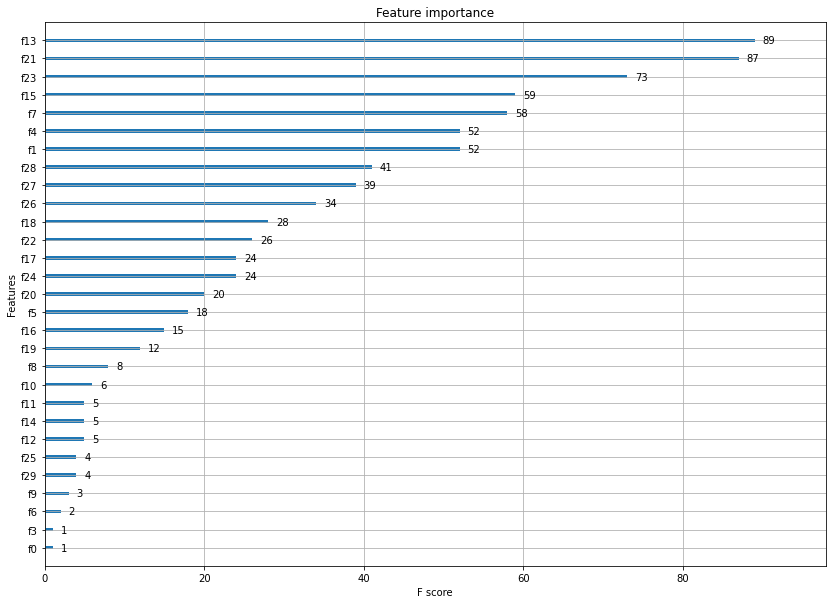

In [88]:
# 변수 중요도
from xgboost import plot_importance

_,ax = plt.subplots( figsize=(14,10))
plot_importance(xgb_model, ax=ax)

# 변수 중요도에 대한 이름이 f0 ~ 순번으로 표기가 되어서 다소 불편함이 있다. 

In [89]:
# 사이킷런 스타일로 래핑한 부스터 자체에서 래핑된 클래스를 사용
# 대충의 성능 평가 확인시
from xgboost import XGBClassifier

In [90]:
xgb_wrapper = XGBClassifier( n_estimators=400, random_state=0)

In [91]:
eval_data = [(X_test, y_test)]
xgb_wrapper.fit(X_train,y_train, early_stopping_rounds=400,
                eval_set=eval_data, eval_metric='logloss',verbose=False)

C:\Users\jinta\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
# 예측
wy_pred = xgb_wrapper.predict(X_test)

In [94]:
# 평가
cal_score(y_test, wy_pred)

혼동행렬(오차행렬) [[52  1]
 [ 1 89]]
정확도 0.986013986013986
정밀도 0.9888888888888889
재현율 0.9888888888888889
F1-score 0.9888888888888889
ROC-AUC 0.9850104821802935


### LightGBM

- XGBoost는 GBM에 비해 상대적으로 빨라졌으나, 그럼에도 다른 알고리즘에 비하면 느리다. 
- 하이퍼파라미터가 너무 복잡하다. 
- 개선점 : 학습시간 단축, H/w 리소스를 사용하는 양도 줄였으면 좋겠다(메모리), 간편했으면.... 
  - LightGBM
  - 특징 
    - 리프를 중심으로 한 트리 분할
      - 기존 방식은 트리의 균형에 방점
      - 균형이 아닌 리프 중심으로 다룬다면 **비대칭**이 될 수 있다. 
      - 노드의 가지치기를 계속 수행하면 오류가 줄어들어 손실이 최소화 된다. 이런 특징을 강조 

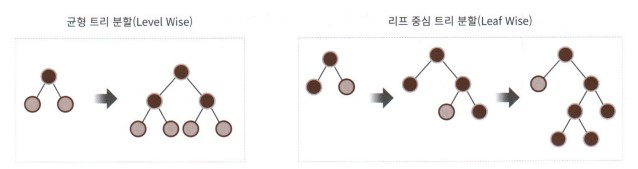

In [95]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블3_lightGBM.jpg')

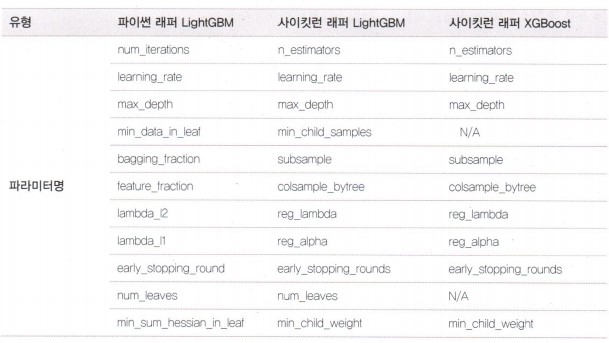

In [97]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블3_lightGBM_param.jpg')

In [99]:
!pip install lightgbm

In [100]:
# 파이썬 스타일 lightgbm
import lightgbm
lightgbm.__version__

'3.2.1'

In [101]:
# 사이킷런 스타일을 차용한 래핑형 lightgbm
from lightgbm import LGBMClassifier

In [102]:
# 기준 사이킷런 스타일 고수
lgbm_clf = LGBMClassifier(n_estimators=400)

In [103]:
# 훈련
lgbm_clf.fit(X_train, y_train,early_stopping_rounds=100, 
             eval_metric='logloss',eval_set=eval_data, verbose=True)

[1]	valid_0's binary_logloss: 0.584425
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.522997
[3]	valid_0's binary_logloss: 0.476643
[4]	valid_0's binary_logloss: 0.433657
[5]	valid_0's binary_logloss: 0.397736
[6]	valid_0's binary_logloss: 0.361209
[7]	valid_0's binary_logloss: 0.336145
[8]	valid_0's binary_logloss: 0.308465
[9]	valid_0's binary_logloss: 0.286251
[10]	valid_0's binary_logloss: 0.264968
[11]	valid_0's binary_logloss: 0.249527
[12]	valid_0's binary_logloss: 0.232139
[13]	valid_0's binary_logloss: 0.216383
[14]	valid_0's binary_logloss: 0.203607
[15]	valid_0's binary_logloss: 0.194972
[16]	valid_0's binary_logloss: 0.18517
[17]	valid_0's binary_logloss: 0.174874
[18]	valid_0's binary_logloss: 0.166478
[19]	valid_0's binary_logloss: 0.15963
[20]	valid_0's binary_logloss: 0.151411
[21]	valid_0's binary_logloss: 0.145433
[22]	valid_0's binary_logloss: 0.139414
[23]	valid_0's binary_logloss: 0.135093
[24]	valid_0's binary_logloss

[354]	valid_0's binary_logloss: 0.0404547
[355]	valid_0's binary_logloss: 0.0402136
[356]	valid_0's binary_logloss: 0.0405034
[357]	valid_0's binary_logloss: 0.0403998
[358]	valid_0's binary_logloss: 0.0401628
[359]	valid_0's binary_logloss: 0.0404107
[360]	valid_0's binary_logloss: 0.0403123
[361]	valid_0's binary_logloss: 0.0400792
[362]	valid_0's binary_logloss: 0.0398288
[363]	valid_0's binary_logloss: 0.0401019
[364]	valid_0's binary_logloss: 0.0398896
[365]	valid_0's binary_logloss: 0.0401989
[366]	valid_0's binary_logloss: 0.0399755
[367]	valid_0's binary_logloss: 0.039876
[368]	valid_0's binary_logloss: 0.0396638
[369]	valid_0's binary_logloss: 0.0394635
[370]	valid_0's binary_logloss: 0.0397702
[371]	valid_0's binary_logloss: 0.039679
[372]	valid_0's binary_logloss: 0.0394665
[373]	valid_0's binary_logloss: 0.039229
[374]	valid_0's binary_logloss: 0.0395205
[375]	valid_0's binary_logloss: 0.0393245
[376]	valid_0's binary_logloss: 0.039125
[377]	valid_0's binary_logloss: 0.0390

LGBMClassifier(n_estimators=400)

In [104]:
y_pred = lgbm_clf.predict(X_test)

In [105]:
cal_score(y_test, y_pred)
# 어느정도 빠르게 적정수준의 모델을 구할 수 있다!!
# xgboost를 사용하기 전에 프로토타입 레벨에서 먼저 선행을 빠르게 시도해 볼 수 있는 알고리즘으로 보인다.
# 단, 튜닝 포인트에 따라서는 점수가 높아질 수도 있다.

혼동행렬(오차행렬) [[50  3]
 [ 1 89]]
정확도 0.972027972027972
정밀도 0.967391304347826
재현율 0.9888888888888889
F1-score 0.978021978021978
ROC-AUC 0.9661425576519916


### 스태킹

#### 테스트 데이터를 예측한 결과만 사용 시

- Stacking
- 여러 모델의 예측 결과들을 기반으로, 이 정보를 메타 정보(예측이 수행된)로 가지고(예측결과가 다시 데이터가 된다), 이 데이터를 이용하여 메타모델을 구축 후 예측 수행한다. 
  - 모델은 2단계에 걸쳐서 생성
  - 예측 결과가 다시 데이터가 되는 형태
- 모델은
  - 1차 모델 : 기본 데이터를 가지고 예측, 여러개의 서로 다른 알고리즘

  - 2차 모델 : 예측된 결과를 데이터로 이용하여 다시 예측

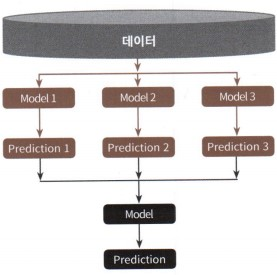

In [107]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블3_스테킹1.jpg')

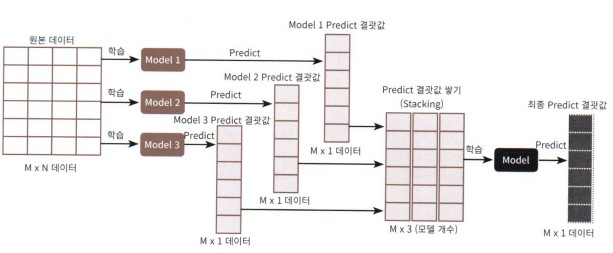

In [108]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블3_스테킹2.jpg')
# 스태킹 기법에 대해 과정을 좀 더 상세하게 묘사

In [109]:
# 위의 그림에 맞춰서 스태킹 진행
# 0. 모듈 가져오기 (나머지들은 이미 위에서 가져오기 했음)
from sklearn.ensemble import AdaBoostClassifier

In [110]:
# 1. 1차 모델용 알고리즘 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier( )
ada_clf = AdaBoostClassifier(n_estimators=100)

In [111]:
# 2. 2차 모델용 알고리즘 준비
lr_clf = LogisticRegression()

# 3. 데이터 준비
# 이미 사전에 준비된 암 데이터를 활용하겠다.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [112]:
# 4. 알고리즘 별로 학습 -> 사이킷런 스타일 -> fit()
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [113]:
# 5. 예측 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

In [114]:
knn_pred.shape, knn_pred

((143,),
 array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0]))

In [115]:
# 6. 예측 결과를 모아서 (143,4)로 배열을 만든다.
np.concatenate([knn_pred, rf_pred, dt_pred, ada_pred]).reshape(-1,143).T

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1,

In [116]:
meta_data = np.array([knn_pred, rf_pred, dt_pred, ada_pred]).T
meta_data.shape
# 부연설명 : 2차 모델을 위한 데이터 준비

(143, 4)

In [117]:
# 7. 2차 모델 학습
# X => meta_data : (예측값, 알고리즘별)
# y => y_test : (정답)
lr_clf.fit(meta_data, y_test)

LogisticRegression()

In [118]:
# 예측 
# 한번도 만나지 않은 데이터를 넣어서 최종 예측 -> 이미 2차 모델에서 훈련 시 사용해 버렸다. 
# 다음번에는 새로운 것을 넣은것을 하거나, 사전에 데이터를 75:25로 나눈 비율을 좀더 세분화 하여 처리
# 지금 작업은 무의미 하지만, 일단 진행(추가 데이터 없어서 재사용)
accuracy_score( y_test, lr_clf.predict(meta_data))

0.972027972027972

In [119]:
# meta_data와 y_test를 이용하여 75:25로 분기후 학습, 예측까지 수행해 보시오
# 여기 한칸에서 모두 진항하세요
# 8-1. 데이터 다시 분할
meta_train, meta_test, meta_y_train, meta_y_test = train_test_split(meta_data, y_test, test_size=0.25, random_state=0)
# 8-2. 알고리즘 생성
lr_clf =LogisticRegression()
# 8-3. 학습
lr_clf.fit(meta_train,meta_y_train)
# 8-4. 예측
meta_predict = lr_clf.predict(meta_test)
accuracy_score(meta_y_test, meta_predict)

0.9722222222222222

In [120]:
meta_train.shape, meta_test.shape, meta_y_train.shape

((107, 4), (36, 4), (107,))

### 검증용 데이터를 예측한 결과와 테스트 데이터를 예측한 결과문 사용 시

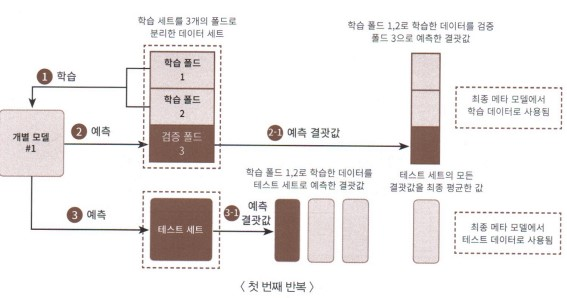

In [121]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블3_스테킹3.jpg')

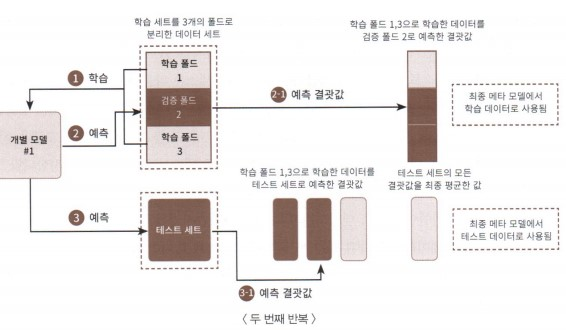

In [122]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블3_스테킹4.jpg')

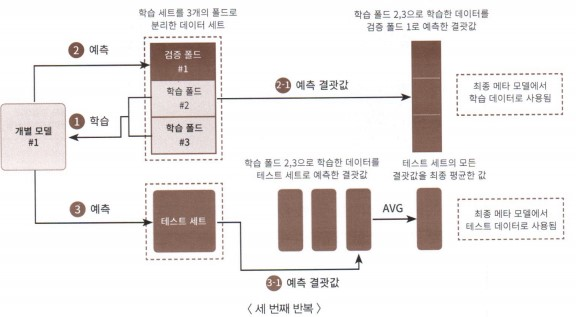

In [123]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블3_스테킹5.jpg')

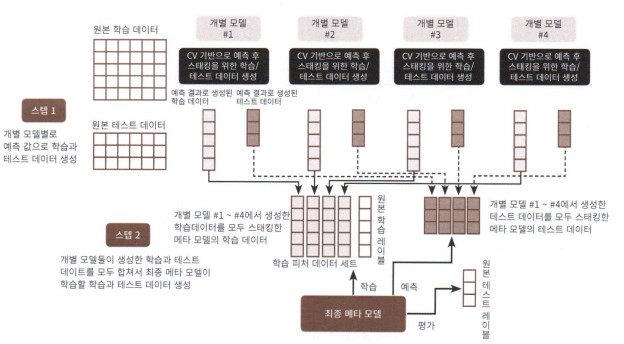

In [124]:
Image('res/머신러닝_알고리즘_참고쟈료/분류_앙상블3_스테킹6.jpg')
# 1차 모델에서 내부적으로 훈련 시 사용하는 검증 폴드를 통해서 예측된 결과물은 
# 이 결과물(예측결과)는 2차 모델의 훈련용 데이터가 된다. 

# 1차 모델들이 훈련이 끝난 후 테스트 데이터로 예측한 결과는 2차 모델의 테스트 데이터가 된다.

In [125]:
from sklearn.model_selection import KFold
# KFold를 활용하여 검증 데이터로 예측한 결과를 직접 수집하기 위해 사용한다.
from sklearn.metrics import mean_absolute_error

In [126]:
# 데이터 확인
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [127]:
def make_stacking_data(clf, X_train, y_train, X_test, n_folds = 7) :
  '''
  - Parameters
    - clf     : 분류기, 알고리즘
    - X_train : 최초 준비된 훈련용 데이터 (특성)
    - y_train : 최초 준비된 훈련용 데이터 (정답)
    - X_test  : 최초 준비된 테스트용 데이터 (특성)
    - n_folds : 폴드 세트수, default : 7
  '''

  train_fold_v_pred = None
  test_pred_avg = None
  # 작업
  # 0부 - 검증 폴드 고찰 -> 기본적으로 폴드 세트수가 필요
  # 이미 데이터 준비시 섞었다. 
  kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
  # 0-1 - 예측 결과를 담을 그릇 -> 배열 ndarrary
  # shape? -> (426, (0 or 1 or 확률값))
  train_fold_v_pred = np.zeros( (X_train.shape[0], 1) )
  # shape? -> (143, ?)
  test_pred = np.zeros((X_test.shape[0], n_folds ))

  # 1부 - 검증 폴드가 이동해 가면서 학습 및 예측을 수행하는데 이 결과를 수집
  # 연속 데이터 타입에서 데이터를 한개씩 꺼내는데, 인덱스 값도 같이 구하고 싶다 -> 어떤 함수
  # train_idx : 학습시 사용하는 훈련용 데이터가 포함된 순번(인덱스 정보)
  # valid_idx ; 학습후 해당세트에서 검증을 하는 검증용 데이터가 포함된 순번(인덱스 정보)
 
  for idx, (train_idx, valid_idx)  in enumerate(kf.split( X_train ))  :
    # print( idx, len(data), type(data), data)
    # X_train 에서 훈련용 데이터,y_train에서 정답 데이터. X_train에서 검증용 데이터 추출
    X_tr = X_train[train_idx] # 훈련용 데이터
    y_tr = y_train[train_idx] # 훈련용 정답
    X_va = X_train[valid_idx] # 검증용 데이터
    # 훈련
    clf.fit(X_tr, y_tr)
    # 예측
    tmp = clf.predict(X_va)
    # print(tmp.shape, type(tmp), tmp.reshape(-1,1))
    # 예측된 결과를 그릇에 담은다. 최초 반복시 그릇의 0~60번 위치에 검증 데이터로 예측한 결과가 들어간다.
    train_fold_v_pred[ valid_idx , :] = tmp.reshape(-1,1)

    # 이렇게 N번 학습된 모델 (clf)을 가지고, 테스트 데이터를 넣어서 예측을 수행
    # 143개의 데이터를 에측
    test_pred[ : ,idx ]= clf.predict(X_test)
    # print(test_pred.shape)
    # 테스트 데이터를 예측한 데이터들을 평균값을 계산하여 반환
    # 7개의 평가값으로 1개의 평균값으로 처리하겠다.
    # (143,7) -> (143,) -> (143,1) -> 향후 알고리즘 별로 나온 결과를 합칠때 편하게 활용하고 변경
    test_pred_avg = np.mean(test_pred, axis =1 ).reshape(-1,1)
    # print(test_pred_avg.shape, test_pred_avg)

    #break

  # 훈련
  # 2부 - 학습이 끝난 모델에 테스트 데이터를 넣어서 예측하고 그 평균을 수집

  # 평균
  # 3부 - 반환 (2차모델을 위한 훈련용 데이터, 2차모델을 위한 테스트 데이터)
  return train_fold_v_pred, test_pred_avg 

knn_train, knn_test = make_stacking_data(knn_clf, X_train, y_train, X_test)
print(knn_train.shape, knn_test.shape)

(426, 1) (143, 1)


C:\Users\jinta\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [128]:
# 알고리즘 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier( )
ada_clf = AdaBoostClassifier(n_estimators=100)

In [129]:
# 1. 알고리즘별로 학습시 검증 폴드가 변경될 때 마다 예측 데이터를 획득 (2차모델의 훈련용 데이터) 
#    위의 방식으로 훈련된 모델을 통해서, 테스트 데이터를 활용하여 예측된 데이터 획득 (2차모델의 테스트 데이터)
knn_train, knn_test = make_stacking_data(knn_clf, X_train, y_train, X_test)
rf_train, rf_test = make_stacking_data(rf_clf, X_train, y_train, X_test)
dt_train, dt_test = make_stacking_data(dt_clf, X_train, y_train, X_test)
ada_train, ada_test = make_stacking_data(ada_clf, X_train, y_train, X_test)

C:\Users\jinta\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\jinta\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\jinta\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\jinta\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is 

In [130]:
# 개별 알고리즘별로 메타데이터를 획득했다.
# 2차 모델에 대한 훈련용 데이터, 테스트용 데이터를 생성 => ( , ) - 2D로 구성
# 단순합치기 
stacking_X_train= np.concatenate((knn_train, rf_train, dt_train,ada_train), axis=1)
stacking_X_train.shape

(426, 4)

In [131]:
stacking_X_test= np.concatenate((knn_test, rf_test, dt_test,ada_test), axis=1)
stacking_X_test.shape

(143, 4)

In [132]:
# 2차 모델 알고리즘 생성
lr_clf = LogisticRegression()
# 학습
lr_clf.fit(stacking_X_train, y_train)

LogisticRegression()

In [133]:
# 예측 및 평가
accuracy_score(y_test, lr_clf.predict(stacking_X_test))

0.972027972027972

### SVM

### 개념

- 가장 넓은 여벽을 클래스로 구분할 수 있게 경계선을 찾는다.
- 2개의 클래스를 확실하게 분류할수 없다면, 가능한 최적의 경계선을 찾는다.
- 주로 이미지 분류에서 많이 사용


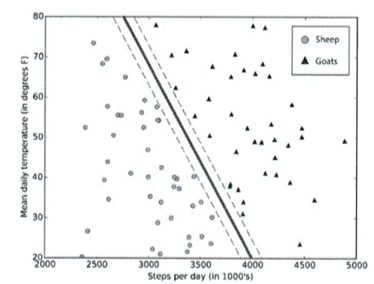

In [135]:
Image('res/머신러닝_알고리즘_참고쟈료/ml-서포트백터머신.png')

### KNN

### 개념

- 클러스터링에서 주로 많이 사용
- 군집에서 확인, 간단

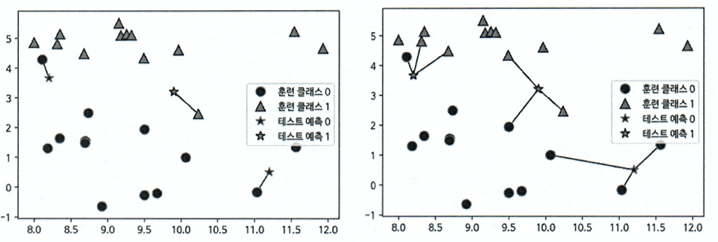

In [136]:
Image('res/머신러닝_알고리즘_참고쟈료/ml-최근접이웃.png')